# Imports

In [1]:
# tensorflow
import tensorflow as tf

# Basics
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt 

# Custom
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

# Classification

There are 3 types of classification problems:
* Binary (A sample can be any of 2 classes)
* Multiclass (A sample can be any of 3 or more classes)
* Multilabel (A sample can be 1, 2, 3 or more classes at the same time)

In [2]:
# Make artificial data
X, Y = make_circles(1000, noise=0.03, random_state=32)

# Split train and test
xtr, xval, ytr, yval = train_test_split(X, Y, test_size=0.30)

# Convert data to tensor
xtr = tf.convert_to_tensor(xtr)
ytr = tf.convert_to_tensor(ytr) 
xval = tf.convert_to_tensor(xval)
yval = tf.convert_to_tensor(yval)

## Making a good model

The problem here is non linearity, a activation function receives a certain "force" from past neurons and decides if the class is 0, 1, 2, etc... The activation functions is tunned during training, to be precise, the neuros "behind" the activation learn how much activation they need to give in order to minimize the loss function, without a activation, your predictions end up being a "non activated force", and end up looking like a regression, or, a "linear problem".

So, lets make model with activation functions!

In [4]:
# Make model
good_nn = tf.keras.Sequential([
    # This is normal in regression or classification problems, but here, we have activations functions to deal with "non-linearity"
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    
    # This is ABSOLUTELY NECESSARY in classifications models, in order to make past "forces" from the other neurons being predictions from 0 to 1, this curve is adjust as training happes
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

# Compile
good_nn.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit
history = good_nn.fit(xtr, ytr, epochs=100)

Epoch 1/100
22/22 [==============================] - 2s 3ms/step - loss: 0.7094 - accuracy: 0.4629
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.7055 - accuracy: 0.4729
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.4571
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4986
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5071
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5086
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5014
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4986
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4943
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4857
Epoch 11/

In [5]:
# Take predictions
yhat = good_nn.predict(xval)

# Show auc
print(f"Auc = {roc_auc_score(yval, yhat)}")

10/10 [==============================] - 0s 2ms/step
Auc = 0.48854961832061067


**See the history**

The history can help you see the model improving at training dataset, and based on thge curve you can best tune the learning rate!

How to find the best learning rate?

- Define a learning rate callback
- Use a modified loss curve plot to better see the learning curve

<AxesSubplot: >

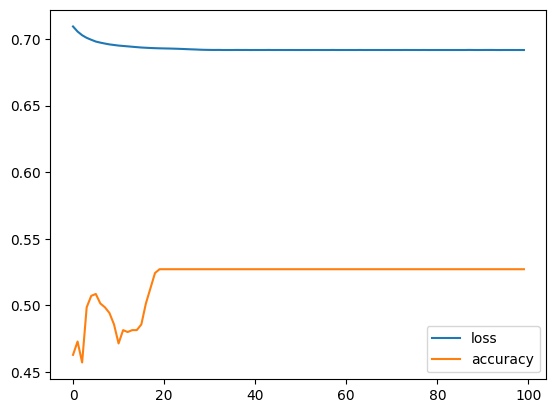

In [6]:
pd.DataFrame(history.history).plot()

In [7]:
# Make another model
model_with_callback = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_with_callback.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# Add calllback
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20), verbose=1)

# Fit
history = model_with_callback.fit(xtr, ytr, epochs=100, callbacks=[lr_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5271 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00011220184543019634.
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5014 - lr: 1.1220e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.00012589254117941674.
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.4971 - lr: 1.2589e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00014125375446227543.
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.4971 - lr: 1.4125e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.00015848931924611136.
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.4971 - lr: 1.5849e-04

Epoch 6: LearningRateScheduler

Make the changed plot to choose ideal learning rate

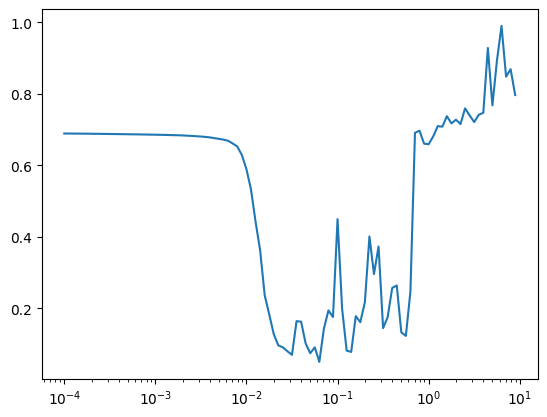

In [8]:
# Transform to dataframe
history_dataframe = pd.DataFrame(history.history)

# Plot
plt.semilogx(history_dataframe["lr"], history_dataframe["loss"]);

The ideal learning rate is when the loss is decresing and low, arround 10**-1.5 in this case

Good learning rates in general:
- 10**0
- 10**-1
- 10**-2
- 10**-3
- 10**-4,
- 1e-4

Lets make a model with the ideal learning rate

In [9]:
# Make another model
model_with_ideal_lr = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Define ideal based on plot above
ideal_lr = 10**-1.6

# Compile
model_with_ideal_lr.compile(
    loss="binary_crossentropy",
    optimizer=tf.optimizers.Adam(learning_rate=ideal_lr),
    metrics=["accuracy"]
)

# Fit
history = model_with_ideal_lr.fit(xtr, ytr, epochs=100, validation_data=[xval, yval])

Epoch 1/100
22/22 [==============================] - 2s 19ms/step - loss: 0.6966 - accuracy: 0.5043 - val_loss: 0.7058 - val_accuracy: 0.4300
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6851 - accuracy: 0.5186 - val_loss: 0.6962 - val_accuracy: 0.4433
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6785 - accuracy: 0.5429 - val_loss: 0.6974 - val_accuracy: 0.4733
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6751 - accuracy: 0.5314 - val_loss: 0.6771 - val_accuracy: 0.5433
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6701 - accuracy: 0.5557 - val_loss: 0.6888 - val_accuracy: 0.4867
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6650 - accuracy: 0.5757 - val_loss: 0.6851 - val_accuracy: 0.5200
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6029 - val_loss: 0.6733 - val_accuracy: 0.5567
Epoch 8/100


Model converged faster! You can check that 100 epochs werent sufficient in past experiments, the accuracy is already good at validation dataset

# Evaluation metrics for classifications models!

- Accuracy = (tp + tn) / tn + tn + fp + fn [Bad for unbaleced]
- Precision = tp / tp + fp [Verifiy if your model is good at seing true positive cases]
- Recall = tp / tp + fn [Verifiy if your model is good at seing true negative cases]

Obs: There is the famous precision and recall tradeoff, in reality when you increase one, you lose the another
- F1 Score = (Precision * Recall) / Precision + Recall

In [11]:
# Accuracy
loss, ac = model_with_ideal_lr.evaluate(xval, yval)

print(f"Model loss: {loss}, Accuracy: {ac * 100}")

10/10 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9800
Model loss: 0.036388497799634933, Accuracy: 98.00000190734863


In [21]:
# Get preds
yhat = np.round(model_with_ideal_lr.predict(xval).ravel())

# Confusion matrix
confusion_matrix(yhat, yval)

10/10 [==============================] - 0s 2ms/step


array([[125,   0],
       [  6, 169]], dtype=int64)

# Multi-classification

If you have more than two classes, its multi-class classification!

To practice this, lets pretend we are a fashion company that wants to predict what a certain piece of clothing is based on its image!

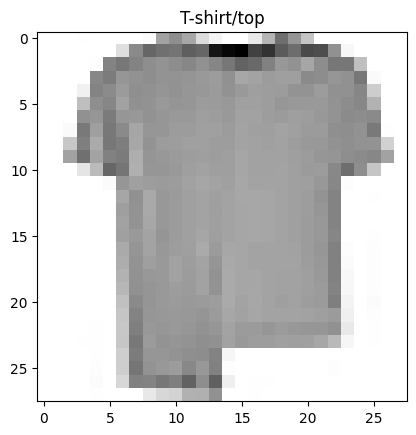

In [2]:
# Import data
from tensorflow.keras.datasets import fashion_mnist

# Take train and evaluation
(xtr, ytr), (xte, yte) = fashion_mnist.load_data()

# Make a list of class name
class_name = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Show one example image and one example la|bel
n = 354
plt.imshow(xtr[n], cmap=plt.cm.binary)
plt.title(class_name[ytr[n]]);

### Building a multi-class classification model:

* Input Shape 28 x 28
* Output Shape: 10, 1
* We need activation functions since there is non linearity (aka, you're predicting things that are [1, 2, 3, ..., 10] not [1.23, 1.56, 2.32, ..., 6.78])
* Output activation now is softmax not sigmoid (Since sigmoid goes from 0 to 1 only, and now we have more than 2 classes)
* Loss function Categorical cross entropy not Binary Cross entropy (Data is not binary anymore)

In [43]:
# Make model
muti_class_model = tf.keras.Sequential([
    # Wtf is this? This is needed to avoid: 
    #   - ValueError: Shapes (32,) and (32, 28, 4) are incompatible
    # What this does?
    #   This takes a matrix and turns it into a vector, if its 28 x 28, its transform it into 728 long vector!
    #   So, if you ever run into a shape vector, transform your data into a vector with the flatten layers
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),

    # Here, its necessary to make the numbers of possible classes as the number of neuros
    tf.keras.layers.Dense(len(np.unique(ytr)), activation="softmax")
])

# Compile
muti_class_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Why sparse? Because the normal version expects your classes to be one hot encoded
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"],
)

# Fit
muti_class_model_history = muti_class_model.fit(xtr, ytr, epochs=50, validation_data=[xte, yte])

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4807 - accuracy: 0.1252 - val_loss: 2.2598 - val_accuracy: 0.1261
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2422 - accuracy: 0.1326 - val_loss: 2.2194 - val_accuracy: 0.1424
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2009 - accuracy: 0.1515 - val_loss: 2.1765 - val_accuracy: 0.1623
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1618 - accuracy: 0.1637 - val_loss: 2.1473 - val_accuracy: 0.1718
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1322 - accuracy: 0.1697 - val_loss: 2.1243 - val_accuracy: 0.1764
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1107 - accuracy: 0.1783 - val_loss: 2.1111 - val_accuracy: 0.1761
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0918 - accuracy: 0.1813 - val_loss: 2.0879 - val_accuracy:

In [44]:
muti_class_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Building a better solution by pre-processing the data:

Neural Network prefers data that is betwen 0 and 1

In [4]:
# Normalize both arrays
scaled_xtr = xtr / xtr.max()
scaled_xte = xte / xte.max()

# Make model again (SAME MODEL AS BEFORE!)
muti_class_model_with_normalized_input = tf.keras.Sequential([
    # Wtf is this? This is needed to avoid: 
    #   - ValueError: Shapes (32,) and (32, 28, 4) are incompatible
    # What this does?
    #   This takes a matrix and turns it into a vector, if its 28 x 28, its transform it into 728 long vector!
    #   So, if you ever run into a shape vector, transform your data into a vector with the flatten layers
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),

    # Here, its necessary to make the numbers of possible classes as the number of neuros
    tf.keras.layers.Dense(len(np.unique(ytr)), activation="softmax")
])

# Compile
muti_class_model_with_normalized_input.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Why sparse? Because the normal version expects your classes to be one hot encoded
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"],
)

# Fit
muti_class_model_normalized_history = muti_class_model_with_normalized_input.fit(scaled_xtr, ytr, epochs=10, validation_data=[scaled_xte, yte])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0357 - accuracy: 0.2225 - val_loss: 1.8281 - val_accuracy: 0.2580
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6415 - accuracy: 0.3538 - val_loss: 1.4736 - val_accuracy: 0.4459
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3161 - accuracy: 0.4767 - val_loss: 1.2027 - val_accuracy: 0.5104
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0980 - accuracy: 0.6078 - val_loss: 1.0362 - val_accuracy: 0.6570
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9600 - accuracy: 0.6711 - val_loss: 0.9281 - val_accuracy: 0.6723
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8767 - accuracy: 0.6898 - val_loss: 0.8664 - val_accuracy: 0.6890
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8250 - accuracy: 0.7055 - val_loss: 0.8277 - val_accuracy:

Oh my gooood, the model has inproved a LOT!

**Seing loss curves of normalized and non-normalized model:**

***Please, never forget normalization!***

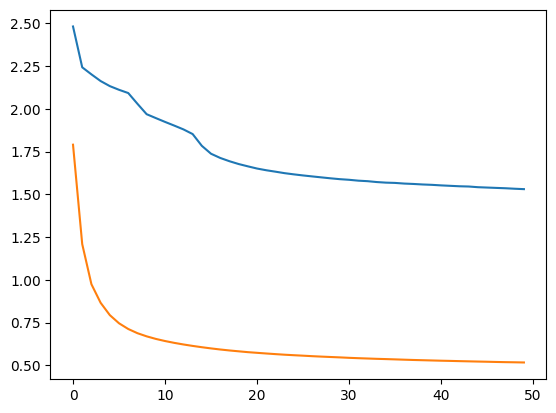

In [66]:
pd.Series(muti_class_model_history.history["loss"]).plot()
pd.Series(muti_class_model_normalized_history.history["loss"]).plot();

Find ideal learning rate

In [8]:
# Normalize both arrays
scaled_xtr = xtr / xtr.max()
scaled_xte = xte / xte.max()

# Make model again (SAME MODEL AS BEFORE! But with learning rate callback)
muti_class_model_with_normalized_input_with_callback = tf.keras.Sequential([
    # Wtf is this? This is needed to avoid: 
    #   - ValueError: Shapes (32,) and (32, 28, 4) are incompatible
    # What this does?
    #   This takes a matrix and turns it into a vector, if its 28 x 28, its transform it into 728 long vector!
    #   So, if you ever run into a shape vector, transform your data into a vector with the flatten layers
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),

    # Here, its necessary to make the numbers of possible classes as the number of neuros
    tf.keras.layers.Dense(len(np.unique(ytr)), activation="softmax")
])

# Add a call back to increase learning rate
def increase_lr(epoch):
    return 1e-3 * 10**(epoch/20)
learning_rate_increase_callback = tf.keras.callbacks.LearningRateScheduler(increase_lr)

# Compile
muti_class_model_with_normalized_input_with_callback.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Why sparse? Because the normal version expects your classes to be one hot encoded
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

# Fit
muti_class_model_normalized_histor_with_callback = muti_class_model_with_normalized_input_with_callback.fit(scaled_xtr, ytr, epochs=10, validation_data=[scaled_xte, yte], callbacks=[learning_rate_increase_callback])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9620 - accuracy: 0.6244 - val_loss: 0.7098 - val_accuracy: 0.7317 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6267 - accuracy: 0.7745 - val_loss: 0.6126 - val_accuracy: 0.7818 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5701 - accuracy: 0.7999 - val_loss: 0.5838 - val_accuracy: 0.7960 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5519 - accuracy: 0.8057 - val_loss: 0.5836 - val_accuracy: 0.7944 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5388 - accuracy: 0.8097 - val_loss: 0.5645 - val_accuracy: 0.8034 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5317 - accuracy: 0.8137 - val_loss: 0.6268 - val_accuracy: 0.7936 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 3s

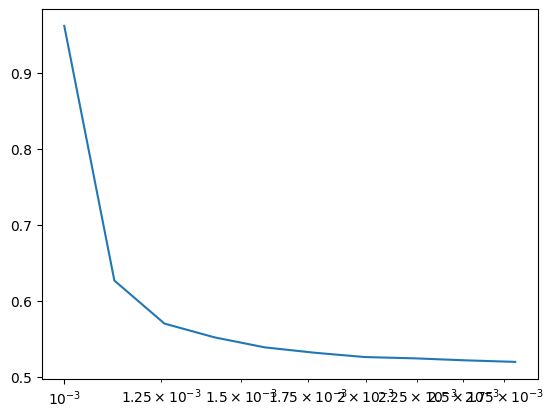

In [11]:
muti_class_model_normalized_histor_with_callback
plt.semilogx(1e-3 * (10**(tf.range(10)/20)), muti_class_model_normalized_histor_with_callback.history["loss"])

10**-3 Its the ideal, and this, is the deafult for Adam optimizer! Wich makes the muti_class_model_with_normalized_input the best model so far

**Evaluate best multiclass model**

- See confusion matrix
- See predictions with visualizations

In [17]:
# Get predictions
yhat = muti_class_model_with_normalized_input.predict(scaled_xte)

# Transform to integers
yhat_integers = yhat.argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [19]:
# Verify confusion matrix
confusion_matrix(yte, yhat_integers)

array([[763,   7,  22, 114,  44,   0,  43,   1,   6,   0],
       [  5, 907,   3,  65,  15,   0,   1,   0,   3,   1],
       [ 17,   3, 575,  22, 297,   0,  66,   0,  20,   0],
       [ 55,  47,   5, 794,  61,   0,  27,   0,  10,   1],
       [  5,   2, 211,  71, 658,   0,  21,   0,  32,   0],
       [  0,   8,   0,   0,   0, 774,   0, 125,   5,  88],
       [218,   4, 200,  79, 371,   1, 100,   0,  27,   0],
       [  0,   0,   0,   0,   0,  43,   0, 913,   0,  44],
       [  1,   2,  34,  13,  49,   2,   4,  12, 871,  12],
       [  0,   1,   1,   0,   2,  31,   0,  48,   9, 908]], dtype=int64)

In [26]:
# See f1_score
f1_score(yte, yhat_integers, average="weighted")

0.7105958175911933

### What patterns the model is learning?

It receives a 784 vector, do random multiplications ussing the default "glorot uniform" parameter, spits outputs and "measures" how well its is going, if its going bad, starting gradient descent at "learning rate" speed, keep doing this with more and more examples until the weights are calibrated at max (this is rare) or until the number of epochs is reached (this is more common)

Wait, what about the biases? They are uptated too, the biases say "'how much the output of none layer influences on the next one", a 4 neuron layer will have 4 biases, so, every neuron will have a individual "influence" on the next layer neurons

In [29]:
# Get weight and biases
weights, biases = muti_class_model_with_normalized_input.layers[1].get_weights()

In [40]:
from tensorflow.keras.utils import plot_model

plot_model(muti_class_model_with_normalized_input, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Tensorflow classification exercises:

1. Make a neural netwqor equal to this link: https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true

In [6]:
# Make model with specified layers
nn = tf.keras.models.Sequential([
    # Make input layer
    tf.keras.layers.InputLayer(input_shape=(1, 1)),
    # Make hidden layers
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
])

# Compile it
nn.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"],
    )

# See summary
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1, 6)              12        
                                                                 
 dense_21 (Dense)            (None, 1, 6)              42        
                                                                 
 dense_22 (Dense)            (None, 1, 6)              42        
                                                                 
 dense_23 (Dense)            (None, 1, 6)              42        
                                                                 
 dense_24 (Dense)            (None, 1, 6)              42        
                                                                 
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________


2. Make a dataset with make moons of scikit-learn and try to make a good tensorflow model to it

In [27]:
# Import dataframe
from sklearn.datasets import make_moons

# Data
X, Y = make_moons()

# Split train and text
xtr, xte, ytr, yte = train_test_split(X, Y, test_size=0.33)

In [28]:
# Make a moddel for this dataset
make_moons_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="sigmoid"),
    tf.keras.layers.Dense(4, activation="sigmoid"),
    tf.keras.layers.Dense(2, activation="sigmoid"),
])

# Compile
make_moons_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"],
)

# Fit
make_moons_model.fit(xtr, ytr, validation_data=[xte, yte])

ValueError: in user code:

    File "c:\Users\PedroMiyasaki\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\PedroMiyasaki\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\PedroMiyasaki\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\PedroMiyasaki\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\PedroMiyasaki\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\PedroMiyasaki\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\PedroMiyasaki\anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\PedroMiyasaki\anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\PedroMiyasaki\anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py", line 2176, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\PedroMiyasaki\anaconda3\envs\tensorflow\lib\site-packages\keras\backend.py", line 5680, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).
